<a href="https://colab.research.google.com/github/Jessica-Emereuwa/Data_science_Project/blob/main/Machine_Learning_Project_Checkpoint_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What You're Aiming For**

1. Dataset Selection:


 * Head over to Kaggle and choose a dataset that aligns with your interests. Ensure it involves either a classification or regression task.
 * Real-world data can be messy, and that's perfectly fine! You're here to tame it.
2. Data Preprocessing:
  * Identify and handle missing values within your dataset. Employ effective strategies for dealing with missing data.
* Implement data cleaning, formatting, and organization to prepare your dataset for training.
3. Feature Engineering:
* Enhance your model's performance by creating new features or transforming existing ones.
* Tailor your feature engineering techniques to address the specific needs of your chosen project.
4. Data Visualization:
* Utilize data visualization techniques to gain insights into your dataset.
* Create visualizations that reveal patterns and relationships, aiding your understanding of the data.
5. Model Selection:
* Choose the right model based on the nature of your problem.
* Consider factors such as the task type (classification or regression), dataset size, and alignment with algorithm assumptions.
6. Model Evaluation:
* Evaluate your model's performance using appropriate metrics for the chosen task (accuracy, classification reports, confusion matrices).
* Use appropriate methods: hyper parameter tuning, cross validation, etc.
* Justify your model selection and discuss the implications of your results.
7. Project Submission:
* Share your code and findings in the assignment section. Provide clear documentation and explanations.
* Highlight any challenges faced during the project and how you overcame them.

**Instructions**

* What dataset did you use?
* Explain your project! I want to see the thinking behind the code essentially.
* e.g. why this project interested you, the steps you took while doing the project, how you decided what model to use.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [49]:
# Load data
df = pd.read_excel('Cleaned Data.xlsx')
df.head()

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


In [50]:
# check for null values
df.isnull().sum()

,0
I am currently employed at least part-time,0
I identify as having a mental illness,0
Education,0
I have my own computer separate from a smart phone,0
I have been hospitalized before for my mental illness,0
How many days were you hospitalized for your mental illness,37
I am legally disabled,0
I have my regular access to the internet,0
I live with my parents,0
I have a gap in my resume,0


In [51]:
# Check for and replace null values with mode
df = df.fillna(df.mode().iloc[0])
df.head()

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,0.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


In [52]:
df.isnull().sum()

,0
I am currently employed at least part-time,0
I identify as having a mental illness,0
Education,0
I have my own computer separate from a smart phone,0
I have been hospitalized before for my mental illness,0
How many days were you hospitalized for your mental illness,0
I am legally disabled,0
I have my regular access to the internet,0
I live with my parents,0
I have a gap in my resume,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   I am currently employed at least part-time                    334 non-null    int64  
 1   I identify as having a mental illness                         334 non-null    int64  
 2   Education                                                     334 non-null    object 
 3   I have my own computer separate from a smart phone            334 non-null    int64  
 4   I have been hospitalized before for my mental illness         334 non-null    int64  
 5   How many days were you hospitalized for your mental illness   334 non-null    float64
 6   I am legally disabled                                         334 non-null    int64  
 7   I have my regular access to the internet                      334 non-n

In [54]:
df.describe()

,I am currently employed at least part-time,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,...,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,...,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,0.679641,0.239521,0.874251,0.077844,2.913174,0.098802,0.964072,0.110778,0.245509,8.497006,...,0.020958,1.194611,0.152695,0.299401,0.257485,0.125749,0.113772,0.146707,0.086826,0.299401
std,0.467315,0.427431,0.332063,0.268328,13.357915,0.298844,0.186390,0.314328,0.431034,20.722643,...,0.143459,8.115227,0.360233,0.458683,0.437905,0.332063,0.318011,0.354344,0.282003,0.458683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.750000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,100.000000,...,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**CONVERT DATA TYPES**

In [55]:
df['Age'] = df['Age'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Household Income'] = df['Household Income'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Device Type'] = df['Device Type'].astype('category')

df

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,0.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,0,0,High School or GED,1,0,0.0,1,1,0,0,...,0.0,0.0,0.0,0.0,1.0,45-60,Female,Prefer not to answer,Mountain,Android Phone / Tablet
330,1,0,Some Undergraduate,1,0,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,18-29,Male,"$50,000-$74,999",Pacific,Windows Desktop / Laptop
331,1,0,Some Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,> 60,Female,"$10,000-$24,999",West North Central,Windows Desktop / Laptop
332,0,1,Some Undergraduate,0,1,1.0,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,18-29,Female,"$0-$9,999",West South Central,Android Phone / Tablet


**REPLACE COLUMNS WITH DESCRIPTIVE NAMES**

In [56]:
df.rename(columns={

    'I identify as having a mental illness': 'MentallyIll',
    'I am currently employed at least part-time': 'Employed',
    'I have my own computer separate from a smart phone': 'OwnComputer',
    'I have been hospitalized before for my mental illness': 'BeenHospitalized',
    'How many days were you hospitalized for your mental illness': 'DaysHospitalized',
    'I am legally disabled': 'LegallyDisabled',
    'I have my regular access to the internet': 'RegularInternetAccess',
    'I live with my parents': 'LiveWithParents',
    'I have a gap in my resume': 'ResumeGap',
    'Total length of any gaps in my resume in months.': 'ResumeGapLength',
    'Annual income (including any social welfare programs) in USD': 'AnnualIncome',
    'I am unemployed': 'Unemployed',
    'I read outside of work and school': 'ReadOutsideWork',
    'Annual income from social welfare programs': 'WelfareIncome',
    'I receive food stamps': 'FoodStamps',
    'I am on section 8 housing': 'Section8Housing',
    'How many times were you hospitalized for your mental illness': 'TimesHospitalized',
    'Lack of concentration': 'LackOfConcentration',
    'Anxiety': 'Anxiety',
    'Depression': 'Depression',
    'Obsessive thinking': 'ObsessiveThinking',
    'Mood swings': 'MoodSwings',
    'Panic attacks': 'PanicAttacks',
    'Compulsive behavior': 'CompulsiveBehavior',
    'Tiredness': 'Tiredness'
}, inplace=True)

df.head()

,Employed,MentallyIll,Education,OwnComputer,BeenHospitalized,DaysHospitalized,LegallyDisabled,RegularInternetAccess,LiveWithParents,ResumeGap,...,ObsessiveThinking,MoodSwings,PanicAttacks,CompulsiveBehavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,0.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


**DROP UNNECESSARY COLUMNS**

In [57]:
columns_to_drop = ['Household Income', 'Device Type', 'Region']
df.drop(columns=columns_to_drop, inplace=True)

df.head()

,Employed,MentallyIll,Education,OwnComputer,BeenHospitalized,DaysHospitalized,LegallyDisabled,RegularInternetAccess,LiveWithParents,ResumeGap,...,LackOfConcentration,Anxiety,Depression,ObsessiveThinking,MoodSwings,PanicAttacks,CompulsiveBehavior,Tiredness,Age,Gender
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,1,1,1.0,0.0,1.0,0.0,0.0,30-44,Male
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,1.0,1,1,0.0,0.0,1.0,0.0,1.0,18-29,Male
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male
3,0,0,Some Undergraduate,1,0,0.0,0,1,1,1,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1,1,1.0,1.0,1.0,1.0,1.0,30-44,Male


**ENCODE CATEGORICAL VARIABLES**

In [59]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['Education', 'Age', 'Gender', 'IncomeBracket']

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df

,Employed,MentallyIll,Education,OwnComputer,BeenHospitalized,DaysHospitalized,LegallyDisabled,RegularInternetAccess,LiveWithParents,ResumeGap,...,Anxiety,Depression,ObsessiveThinking,MoodSwings,PanicAttacks,CompulsiveBehavior,Tiredness,Age,Gender,IncomeBracket
0,0,0,3,0,0,0.0,0,1,0,1,...,1,1,1.0,0.0,1.0,0.0,0.0,1,1,0
1,1,1,4,1,0,0.0,0,1,0,0,...,1,1,0.0,0.0,1.0,0.0,1.0,0,1,0
2,1,0,2,1,0,0.0,0,1,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,1,1,0
3,0,0,5,1,0,0.0,0,1,1,1,...,0,0,0.0,0.0,0.0,0.0,0.0,1,1,1
4,1,1,2,1,1,35.0,1,1,0,1,...,1,1,1.0,1.0,1.0,1.0,1.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,0,0,3,1,0,0.0,1,1,0,0,...,0,0,0.0,0.0,0.0,0.0,1.0,2,0,1
330,1,0,5,1,0,0.0,0,1,1,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0,1,0
331,1,0,5,1,0,0.0,0,1,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,3,0,1
332,0,1,5,0,1,1.0,1,1,1,1,...,1,1,1.0,1.0,1.0,1.0,1.0,0,0,0


**FEATURE ENGINEERING**

In [58]:
df['IncomeBracket'] = pd.cut(df['AnnualIncome'], bins=[0, 25000, 50000, 75000, 100000, 150000, np.inf], labels=['<25K', '25K-50K', '50K-75K', '75K-100K', '100K-150K', '>150K'])

df.head()


,Employed,MentallyIll,Education,OwnComputer,BeenHospitalized,DaysHospitalized,LegallyDisabled,RegularInternetAccess,LiveWithParents,ResumeGap,...,Anxiety,Depression,ObsessiveThinking,MoodSwings,PanicAttacks,CompulsiveBehavior,Tiredness,Age,Gender,IncomeBracket
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1,1,1.0,0.0,1.0,0.0,0.0,30-44,Male,<25K
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,1,1,0.0,0.0,1.0,0.0,1.0,18-29,Male,<25K
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,<25K
3,0,0,Some Undergraduate,1,0,0.0,0,1,1,1,...,0,0,0.0,0.0,0.0,0.0,0.0,30-44,Male,NaN
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1,1,1.0,1.0,1.0,1.0,1.0,30-44,Male,<25K


**NORMALIZE FEATURES**

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['DaysHospitalized', 'ResumeGap', 'AnnualIncome']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


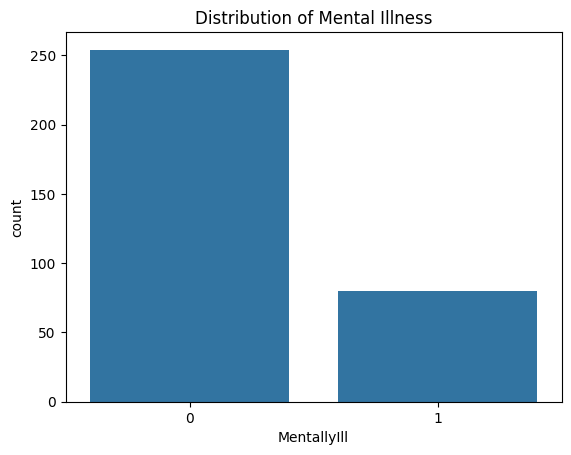

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='MentallyIll', data=df)
plt.title('Distribution of Mental Illness')
plt.show()


# **MODEL SELECTION**

**SPLIT DATA**

In [62]:
from sklearn.model_selection import train_test_split

X = df.drop('MentallyIll', axis=1)
y = df['MentallyIll']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [63]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Employed                                          334 non-null    int64  
 1   Education                                         334 non-null    int64  
 2   OwnComputer                                       334 non-null    int64  
 3   BeenHospitalized                                  334 non-null    int64  
 4   DaysHospitalized                                  334 non-null    float64
 5   LegallyDisabled                                   334 non-null    int64  
 6   RegularInternetAccess                             334 non-null    int64  
 7   LiveWithParents                                   334 non-null    int64  
 8   ResumeGap                                         334 non-null    float64
 9   Total length of any g

In [64]:
y_train.value_counts()

,count
MentallyIll,
0,172
1,61


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[74  8]
 [ 1 18]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94        82
           1       0.69      0.95      0.80        19

    accuracy                           0.91       101
   macro avg       0.84      0.92      0.87       101
weighted avg       0.93      0.91      0.92       101



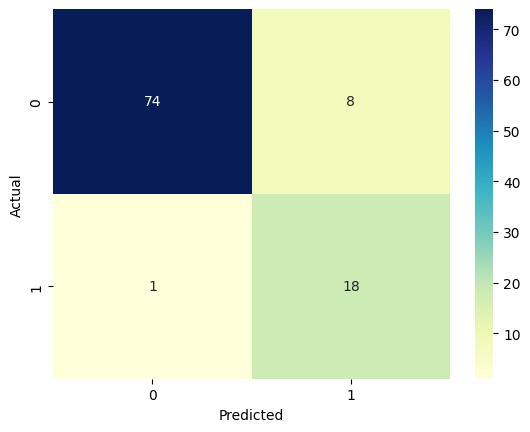

In [67]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **PROJECT SUMMARY**

***DATASET USED:***
For this project, I used a dataset that contains various features related to individuals' mental health, including employment status, mental illness identification, education, access to resources, hospitalization history, and demographic details. The dataset includes columns like:

* Employment status
* Mental illness identification
* Education level
* Computer ownership
* Hospitalization history
* Access to the internet
* Living situation
* Resume gaps
* Mental health conditions (e.g., obsessive thinking, mood swings, panic attacks)
* Demographic information (e.g., age, gender, income bracket)


***STEPS TAKEN:*** I cleaned and preprocessed the data, engineered features, and visualized patterns. I then selected and trained a classification model to predict mental health status based on various features.


***Justification of Model Selection:***

For this project, I selected the RandomForestClassifier due to several reasons:

***Handling of Categorical Features:*** Random forests are robust against overfitting and can handle categorical features well, especially when encoded properly. They also manage large datasets efficiently.

***Feature Importance:*** Random forests provide insights into feature importance, which can be valuable in understanding the impact of different variables on the prediction of mental illness.

***Performance:*** With its ensemble approach of combining multiple decision trees, Random Forests generally offer a high level of accuracy and are less prone to overfitting compared to single decision trees.


# *Project Explanation*
**Interest and Motivation:** The primary motivation behind this project was to leverage machine learning techniques to predict mental health conditions based on various socio-economic and personal factors. Understanding and predicting mental health issues can be crucial for early intervention and providing support. This project is relevant because it combines real-world challenges with data science, making it a valuable exercise in both data analysis and model building.